In [1]:
import matplotlib.pyplot as pyplot
import numpy as np
pyplot.rcParams['axes.linewidth'] = 2 #set the value globally
pyplot.rcParams['image.aspect'] = 0.7
pyplot.rcParams['legend.numpoints'] = 1
pyplot.rcParams['legend.scatterpoints'] = 1
pyplot.rcParams["font.family"] = "Times New Roman"
pyplot.rcParams["mathtext.default"] = "it"
pyplot.rcParams['mathtext.fontset'] = 'cm'
pyplot.rcParams['text.usetex'] = False
#pyplot.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
from matplotlib import cm, ticker, colors

import numpy as np
from matplotlib import pyplot as pl

from CC3 import bits
from CC3 import diagrams
from CC3 import tableaux
from CC3 import vmc
from CC3 import model
from CC3 import wf

save = 0
N=3 # number of clusters
L0=4 # size of cluster

# E0 = -0.45638667611714656 # for 8 sites total
E0 = -0.44894924312043477 # for 12 sites total

hami = model.Heisenberg(N,L0,True,-1)

new_ops = hami.new_ops
new_ops = np.asarray(new_ops)
   
Eloc = new_ops[0]
Sz = new_ops[-1]
P = new_ops[-2]

def get_rel_E(EE, E0):
    EE = np.array(EE)
    return (EE - E0) / abs(E0)

if 1:
    update_hami = model.Heisenberg(N,L0,True,-1,True)
    system = vmc.CC(hami,hami,min(N,10),3)
    basis = hami.full_basis()
    print(len(basis))
    # print(f'{basis = }')
    


import torch
import torch.nn as nn

class T1NN(nn.Module):
    def __init__(self, t1_shape):
        super().__init__()
        self.t1_shape = t1_shape
        self.N = t1_shape[0]
        self.dim = t1_shape[1]
        # Two parameters per element: a and b
        self.a = nn.Parameter(torch.randn(self.dim) * 0.01)
        # self.b = nn.Parameter(torch.randn(self.dim) * 0.01)

    def forward(self, x=1.0):
        # x can be a scalar or tensor broadcastable to t1_shape
        # x = x[0]
        # t1_row = self.a * x + self.b
        t1_row = self.a
        t1 = torch.zeros(self.N, self.dim)
        t1[0] = t1_row
        return t1
    
class T2NN(nn.Module):
    def __init__(self, t2_shape, Sz):
        super().__init__()
        self.t2_shape = t2_shape
        self.N, _, self.dim, _ = t2_shape
        # For each unique (i, j) with i < j, create a unique mat (a, b for each element)
        self.unique_pairs = [(i, j) for i in range(self.N) for j in range(i+1, self.N)]
        self.a = nn.ParameterList([
            nn.Parameter(torch.randn(self.dim, self.dim) * 0.01)
            for _ in self.unique_pairs
        ])
        # self.b = nn.ParameterList([
        #     nn.Parameter(torch.randn(self.dim, self.dim) * 0.01)
        #     for _ in self.unique_pairs
        # ])

    def forward(self, x=1.0):
        t2 = torch.zeros(self.N, self.N, self.dim, self.dim)
        for idx, (i, j) in enumerate(self.unique_pairs):
            # mat = self.a[idx] * x + self.b[idx]
            mat = self.a[idx]
            t2[i, j] = mat
        return t2

class T3NN(nn.Module):
    def __init__(self, t3_shape):
        super().__init__()
        self.t3_shape = t3_shape
        self.N, _, _, self.dim, _, _ = t3_shape
        self.unique_trips = [(i, j, k) for i in range(self.N) \
                                for j in range(i+1, self.N) \
                                    for k in range(j+1, self.N)]

        # Only create parameters for the unique triple [0,1,2] if N=3
        self.a = nn.ParameterList([
            nn.Parameter(torch.randn(self.dim, self.dim, self.dim) * 0.01)
            for _ in self.unique_trips
        ])
        # self.b = nn.ParameterList([
        #     nn.Parameter(torch.randn(self.dim, self.dim, self.dim) * 0.01)
        #     for _ in self.unique_trips
        # ])

    def forward(self, x=1.0):
        t3 = torch.zeros(self.N, self.N, self.N, self.dim, self.dim, self.dim)
        for idx, (i, j, k) in enumerate(self.unique_trips):
            mat = self.a[idx] * x #+ self.b[idx]
            t3[i, j, k] = mat
        return t3
    

4 0 [0]
4 1 [1, 2, 4, 8]
4 2 [3, 5, 6, 9, 10, 12]
4 3 [7, 11, 13, 14]
4 4 [15]
Dim= 16
Basis:
[0, 1, 2, 4, 8, 3, 5, 6, 9, 10, 12, 7, 11, 13, 14, 15]
[1, 4, 6, 4, 1]
[0.75]
[-0.95710678 -0.25        0.45710678  0.75      ]
[-1.6160254  -0.95710678 -0.25        0.1160254   0.45710678  0.75      ]
[-0.95710678 -0.25        0.45710678  0.75      ]
[0.75]
0  Sz=  0.0  E=  -1.6160254037844384
1  Sz=  -0.9999999999999997  E=  -0.9571067811865472
2  Sz=  0.9999999999999997  E=  -0.9571067811865472
3  Sz=  0.0  E=  -0.9571067811865476
4  Sz=  -0.9999999999999999  E=  -0.24999999999999994
5  Sz=  0.9999999999999999  E=  -0.24999999999999994
6  Sz=  0.0  E=  -0.25
7  Sz=  0.0  E=  0.11602540378443858
8  Sz=  0.0  E=  0.45710678118654763
9  Sz=  -1.0000000000000002  E=  0.4571067811865476
10  Sz=  1.0000000000000002  E=  0.4571067811865476
11  Sz=  -2.0  E=  0.75
12  Sz=  0.0  E=  0.75
13  Sz=  2.0  E=  0.75
14  Sz=  -0.9999999999999994  E=  0.7499999999999997
15  Sz=  0.9999999999999994  E=  0.74

Number of parameters in nn1: 16
Number of parameters in nn2: 768
Number of parameters in nn3: 4096
Number of parameters in total: 4880
Iter  0 -0.37155085705956314
[0 0 0]
Iter  1 -0.37676562811489406
[0 0 0]
Iter  2 -0.3815000653413035
[0 0 0]
Iter  3 -0.385759341017039
[0 0 0]
Iter  4 -0.3895679301091064
[0 0 0]
Iter  5 -0.39295601375989575
[0 0 0]
Iter  6 -0.39595552580466015
[0 0 0]
Iter  7 -0.39860107445390347
[0 0 0]
Iter  8 -0.4009307286179626
[0 0 0]
Iter  9 -0.402983702987669
[0 0 0]
Iter  10 -0.404796896157372
[0 0 0]
Iter  11 -0.4064030850449059
[0 0 0]
Iter  12 -0.4078310966812717
[0 0 0]
Iter  13 -0.40910696902225335
[0 0 0]
Iter  14 -0.4102545263095756
[0 0 0]
Iter  15 -0.41129493390867494
[0 0 0]
Iter  16 -0.41224589111979376
[0 0 0]
Iter  17 -0.41312145865075833
[0 0 0]
Iter  18 -0.41393290610448186
[0 0 0]
Iter  19 -0.41468987296638904
[0 0 0]
Iter  20 -0.41540096276670607
[0 0 0]
Iter  21 -0.4160736251123858
[0 0 0]
Iter  22 -0.41671387372590113
[0 0 0]
Iter  23 -0.41

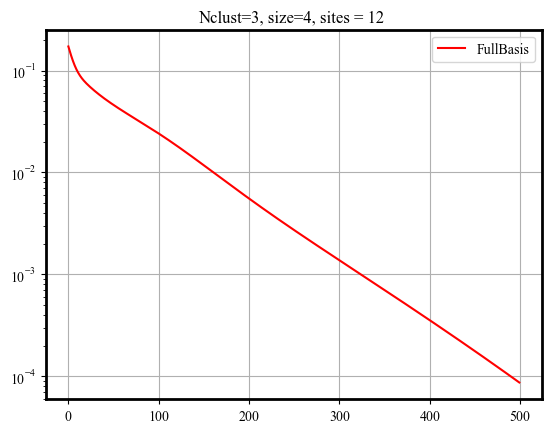

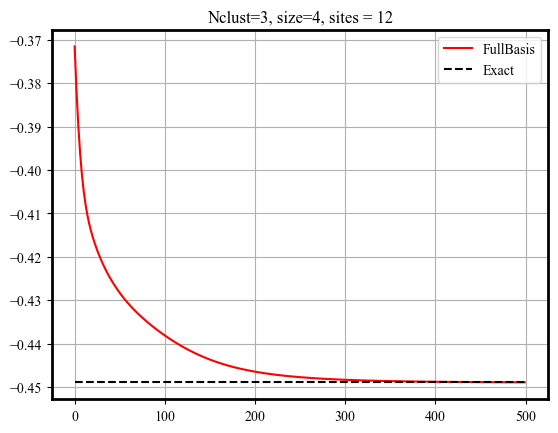

In [ ]:

t1_shape = (hami.N, hami.dim)
t2_shape = (hami.N, hami.N, hami.dim, hami.dim)
t3_shape = (hami.N, hami.N, hami.N, hami.dim, hami.dim, hami.dim)

nn_1 = T1NN(t1_shape)
nn_2 = T2NN(t2_shape, Sz)
nn_3 = T3NN(t3_shape)
t1 = nn_1()
t2 = nn_2()
t3 = nn_3()

eps = 0.01
energies = []
#t1[:] = 1.
#### OPTIMIZATION LOOP

# print(f'{t1 = }')
# print(f'{t2 = }')

# from CC3 import vmc_custom
from CC3 import model_custom

t1_0 = t1.clone()
t2_0 = t2.clone()
t3_0 = t3.clone()

opt1 = torch.optim.Adam(nn_1.parameters(), lr=1e-3)
opt2 = torch.optim.Adam(nn_2.parameters(), lr=1e-3)
opt3 = torch.optim.Adam(nn_3.parameters(), lr=1e-3)

if 1:
    num_params1 = sum(p.numel() for p in nn_1.parameters())
    num_params2 = sum(p.numel() for p in nn_2.parameters())
    num_params3 = sum(p.numel() for p in nn_3.parameters())
    num_params = num_params1 + num_params2 + num_params3
    print(f"Number of parameters in nn1: {num_params1}")
    print(f"Number of parameters in nn2: {num_params2}")
    print(f"Number of parameters in nn3: {num_params3}")
    print(f"Number of parameters in total: {num_params}")

import time 

t0 = time.time()


if 1: # full basis
    basis = system.model.full_basis()
    
    for iter in range(500):
        opt1.zero_grad()
        opt2.zero_grad()
        opt3.zero_grad()

        t1 = nn_1.forward()
        t2 = nn_2.forward()
        t3 = nn_3.forward()
        
        E,Hdpsi,Hdpsi2, Hdpsi3,dpsi,dpsi2, dpsi3 = \
            vmc.exact_sum(system, basis,
                                   t1.detach().numpy(),
                                   t2.detach().numpy(),
                                   t3.detach().numpy())
   
        print("Iter ",iter,E/system.L0/system.N)

        Hdpsi = torch.from_numpy(Hdpsi).float()
        Hdpsi2 = torch.from_numpy(Hdpsi2).float()
        Hdpsi3 = torch.from_numpy(Hdpsi3).float()

        derivs = Hdpsi - E*dpsi
        derivs2 = Hdpsi2 - E*dpsi2
        derivs3 = Hdpsi3 - E*dpsi3

        t1.backward(derivs, retain_graph=True)
        t2.backward(derivs2, retain_graph=True)
        t3.backward(derivs3, retain_graph=True)


        opt1.step()
        opt2.step()
        opt3.step()



        energies += [E/system.L0/system.N]
        print(system.state)
        print("========================================")
    
    if save:
        np.savetxt(f"data/EE_N={N}_L0={L0}.txt", energies)
                
    t = time.time() - t0
    print(f'Time taken for optimization: {t:.2f} seconds')
    print(f'{t1.shape = }')
    print(f'{t2.shape = }')
    print(f'{t3.shape = }')

    print(f'{derivs.shape = }')
    # print(f'{derivs2.shape = }')
    print(f'{derivs3.shape = }')



    t1diff = t1 - t1_0
    t1diff = t1diff.detach().numpy()
    t2diff = t2 - t2_0
    t2diff = t2diff.detach().numpy()
    t3diff = t3 - t3_0
    t3diff = t3diff.detach().numpy()


    print("Number of nonzero elements in t1diff:", np.count_nonzero(t1diff))
    print("Number of nonzero elements in t2diff:", np.count_nonzero(t2diff))
    print("Number of nonzero elements in t3diff:", np.count_nonzero(t3diff))





x1 = np.arange(len(energies))

pl.figure()
pl.plot(x1, get_rel_E(energies,E0), label='FullBasis', color='red')
pl.title(f'Nclust={N}, size={L0}, sites = {N*L0} ')
pl.yscale('log')
pl.grid()
pl.legend()
pl.show()


pl.figure()
pl.plot(x1, energies, label='FullBasis', color='red')
pl.title(f'Nclust={N}, size={L0}, sites = {N*L0}')
pl.hlines(E0, 0, len(x1), color='black', linestyle='--', label='Exact')
pl.grid()
pl.legend()
pl.show()



In [4]:
print(f'Time taken for optimization: {t:.2f} seconds')

Time taken for optimization: 504.28 seconds
